# Manipulate Images of PPDisk Model - Dust Continuum

## 00 - About *HD163296*

### Information:
* RA DEC (FK5): 17h53m20.6063742757s -21d56m57.379723676s
* Star Class: Herbig Ae/Be star
* Spectral Type: A1Vep C
* Star Mass: 2.3 $M_{\odot}$
* Star Radius: 1.66 $R_{\odot}$
* Star Temperature: 9330 K
* Distance to us: 140. pc
* Inclination Angle: $42^{\circ}$
* Position Angle: $132^{\circ}$
* Disk Radius: 250. unit:AU
* Gap Position: 60., 100., 160. unit:AU

### Reference:
* *Rosenfeld et al.(2013)*
* *Isella et al. (2016)*
* *Gregorio-Monsalvo et al. (2013)*
* http://simbad.u-strasbg.fr/simbad/sim-id?Ident=HD+163296
* http://www.exoplanetkyoto.org/exohtml/HD_163296.html
* https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html

### Observation Data:
* Band6 Continumm: 
    * <a href="https://jvo.nao.ac.jp/portal/alma/archive.do?action=target.info&target=HD_163296&orderBy=&order=&showAll=false&limit=500&offset=0&freqType=X&freq=&freqAndOr=and&freqLow=&freqUpp=&fbclid=IwAR1eZRK1ERP1FuIdsGMyY4XEotGVWUjyU1P3Hh1yquWG90CzCnESUYvPCuk"> ALMA Fits Archive - ALMA01117198 (calibrated_final_cont.image.fits)</a>
        * This image hasn't done pbcor. (Primary Beam Correction)
* CO 3-2 Line:
    * <a href="https://jvo.nao.ac.jp/portal/alma/sv.do?action=target.info&target=HD163296"> ALMA SV Fits Archive - ALMA00000095 (HD163296.CO3-2Line.Clean.image.fits)</a>

## 01 - Setup

In [2]:
import os
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from matplotlib import cm
from radmc3dPy import *
from astropy.io import fits

## 02 - Model Parameter

* ALMA BAND 6 Parameter

In [3]:
Bmaj = 0.27366140484810003      # arcsec (diameter)
Bmin = 0.18321035802364802      # arcsec (diameter)
PA   = -87.8557434082           # deg
Dpc  = 122.                     # Parsec
arcs_pixel   = 0.03             # Arcsec / Pixel
pixel_number = 960              # Pixel Number
Freq = 2.260538233010E+11       # width: 1.306843347216E+10 
B_Pixel = Bmaj/2 * Bmin/2 * np.pi / (arcs_pixel*arcs_pixel)   # Beam / Pixel

In [ ]:
# Ring Gap parameters
Gpc  = [60.*natconst.au, 100.*natconst.au, 160.*natconst.au]
# Widest Gap parameters
Wwid = [33.*natconst.au, 26.*natconst.au, 55.*natconst.au] 
Wddep = [13., 7., 3.6]
WCOdep = [1., 3.5, 1.8]
# Narrowest Gap parameters
Nwid = [15.*natconst.au, 12.*natconst.au, 15.*natconst.au] 
Nddep = [150., 70., 6.]
NCOdep = [2.5, 70., 6.]

## 03 - Basic Manipulation

### (1) Convolution
*  ALMA Resolution FWHM(") = 76 / max_baseline(km) / frequency(GHz) 

## 04 - Convolution and Transform from **Jy/Pixel** to **Jy/Beam**

### (1) Use Radmc3D **ImConv**
* This Method is included in Radmc3D package
* But it seems not working well for now

Reading image.out


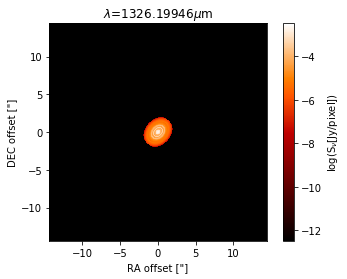

{'implot': <matplotlib.image.AxesImage at 0x7fa27aac7ba8>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7fa27aa87668>}

In [3]:
image.makeImage(npix=pixel_number, incl=42., posang=-132., wav=natconst.cc/Freq*1e4, sizeau=pixel_number*Dpc*arcs_pixel)
im = image.readImage()
im.writeFits('Before_imConv.fits', dpc=Dpc, coord='17h56m21.2814s -21d57m22.358s')
image.plotImage(im, arcsec=True, dpc=122., log=True, maxlog=10, bunit='snu', cmap=plt.cm.gist_heat)

Reading image.out


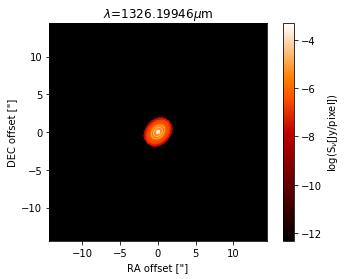

After_imConv_Circ.fits already exists


Do you want to overwrite it (yes/no)? yes


In [7]:
image.makeImage(npix=pixel_number, incl=42., posang=-132., wav=natconst.cc/Freq*1e4, sizeau=pixel_number*Dpc*arcs_pixel)
cim1 = image.readImage()
cim1.imConv(psfType='gauss', fwhm=[((Bmaj/2 + Bmin/2)), ((Bmaj/2 + Bmin/2))], pa=PA, dpc=Dpc)
image.plotImage(cim1, arcsec=True, dpc=122., log=True, maxlog=9, bunit='snu', cmap=plt.cm.gist_heat)
cim1.writeFits('After_imConv_Circ.fits', dpc=Dpc, coord='17h56m21.2814s -21d57m22.358s')

Reading image.out


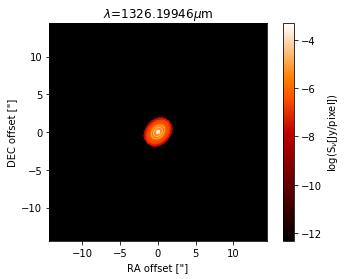

After_imConv_Ellip.fits already exists


Do you want to overwrite it (yes/no)? yes


In [8]:
image.makeImage(npix=pixel_number, incl=42., posang=-132., wav=natconst.cc/Freq*1e4, sizeau=pixel_number*Dpc*arcs_pixel)
cim2 = image.readImage()
cim2.imConv(psfType='gauss', fwhm=[Bmaj, Bmin], pa=PA, dpc=Dpc)
image.plotImage(cim2, arcsec=True, dpc=122., log=True, maxlog=9, bunit='snu', cmap=plt.cm.gist_heat)
cim2.writeFits('After_imConv_Ellip.fits', dpc=Dpc, coord='17h56m21.2814s -21d57m22.358s')

In [9]:
# Data_P = fits.getdata(output)
# Data_B = Data_P * B_Pixel
# Head_B = fits.getheader(output)
# fits.writeto(output, Data_B, Head_B, overwrite=True)

### (2) Use Astropy Convolution

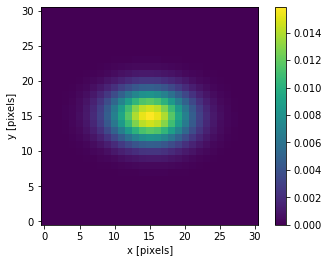

All Prob Sum Up = 0.999940


In [25]:
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
import matplotlib.pyplot as plt

xfwhm = Bmaj
yfwhm = Bmin
xstddev = (xfwhm/arcs_pixel) / 2.355
ystddev = (yfwhm/arcs_pixel) / 2.355
rotation = np.pi/2 - PA / 180 * np.pi # Different Def. of position angle and rotation angle (astropy)

gaussian_2D_kernel = Gaussian2DKernel(xstddev, ystddev, rotation)
plt.imshow(gaussian_2D_kernel, interpolation='none', origin='lower')
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
plt.colorbar()
plt.show()

#print(dir(gaussian_2D_kernel))
print('All Prob Sum Up = %.6f' % gaussian_2D_kernel._array.sum())

In [5]:
image.makeImage(npix=pixel_number, incl=42., posang=-132., wav=natconst.cc/Freq*1e4, sizeau=pixel_number*Dpc*arcs_pixel)
cim = image.readImage()
cim.writeFits('Before_Conv.fits', dpc=Dpc, coord='17h56m21.2814s -21d57m22.358s')
Data_P = fits.getdata('Before_Conv.fits')[0]
Data_B = B_Pixel * Data_P
Head_B = fits.getheader('Before_Conv.fits')
fits.writeto('Before_Conv.fits', Data_B, Head_B, overwrite=True)

kernel = Gaussian2DKernel(x_stddev=xstddev, y_stddev=ystddev, theta=-rotation)
astropy_conv = convolve(Data_B, kernel)
Head_B = fits.getheader('Before_Conv.fits')
fits.writeto('After_Conv.fits', astropy_conv, Head_B, overwrite=True)

Reading image.out
Before_Conv.fits already exists


Do you want to overwrite it (yes/no)? yes


## 05 - Data Analysis

### (1) Load Simulation Data And Observation Data

In [4]:
data_obs = fits.getdata('ALMA01117198.fits')[0,0]
head_obs = fits.getheader('ALMA01117198.fits')
data_sim = fits.getdata('After_Conv.fits')
head_sim = fits.getheader('After_Conv.fits')

### (2) Accumulate Intensity Ring by Ring

In [5]:
def accum_test(data, pa, inc):
    data[data < 0.] = 0
    th = pa/180*np.pi
    phi = inc/180*np.pi
    cent_x, cent_y = len(data)/2, len(data)/2
    xs = np.array([[i-cent_x for i in range(len(data))] for i in range(len(data))])
    ys = np.array([[i-cent_y for i in range(len(data))]for j in range(len(data))]).T
    xxs = xs*np.cos(th) + ys*np.sin(th)
    yys = xs*np.cos(phi)*np.sin(th) - ys*np.cos(phi)*np.cos(th)
    rrs = (xxs**2 + yys**2)**0.5
    return rrs

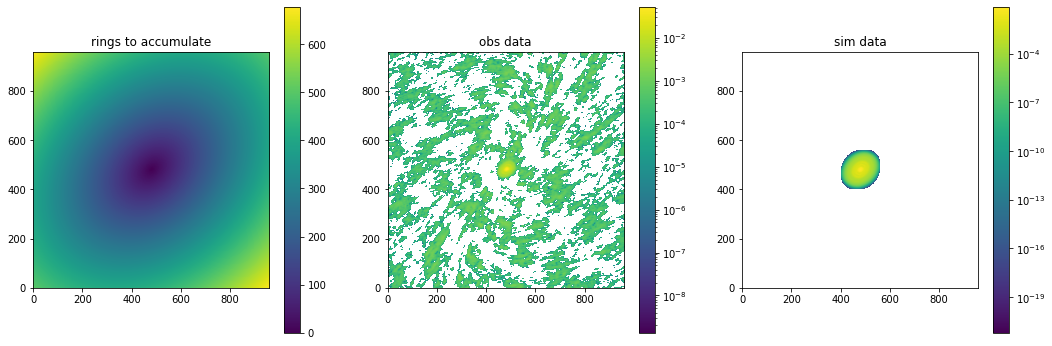

In [6]:
rings = accum_test(data_obs, 132, 42)
from matplotlib.colors import LogNorm
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(rings, origin='lower')
plt.title('rings to accumulate')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(data_obs, norm=LogNorm(), origin='lower')
plt.title('obs data')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(data_sim, norm=LogNorm(), origin='lower')
plt.title('sim data')
plt.colorbar()
plt.show()

In [17]:
def elliptical_accum(data, dr=10, pa=132, inc=42, arcs_pixel=0.03, dpc=122.):
    '''
    Accumulate Elliptical Ring on 2D Image
    
    data: 2D array
    dr: width to accumulate (unit: au)
    pa: position angle      (unit: deg)
    inc: inclination angle  (unit: deg)
    '''
    
    # Data Preset
    data[data < 0.] = 0
    th = pa/180*np.pi
    phi = inc/180*np.pi
    cent_x, cent_y = len(data)/2, len(data)/2
    
    xs = np.array([[i-cent_x for i in range(len(data))] for i in range(len(data))])
    ys = np.array([[i-cent_y for i in range(len(data))]for j in range(len(data))]).T
    xxs = xs*np.cos(th) + ys*np.sin(th)
    yys = xs*np.cos(phi)*np.sin(th) - ys*np.cos(phi)*np.cos(th)
    rrs = (xxs**2 + yys**2)**0.5
    
    dr  = dr/dpc/arcs_pixel # pixel
    drrs = np.arange(dr, len(data)/2, dr)
    accum_ints = np.zeros(len(drrs))
    accum_stds = np.zeros(len(drrs))
    for i in range(len(drrs)):
        ring = np.where(abs(rrs-drrs[i]) <= dr)
        accum_ints[i] = np.sum(data[ring])/len(data[ring])
        accum_stds[i] = np.std(data[ring])
    
    au_pixel = arcs_pixel * dpc
    drrs *= au_pixel
    return drrs, accum_ints, accum_stds

In [18]:
rr1, accum1, std1 = elliptical_accum(data_obs, 5)
rr2, accum2, std2 = elliptical_accum(data_sim, 5)
peak1, peak2 = max(accum1), max(accum2)
peak = max(peak1, peak2)

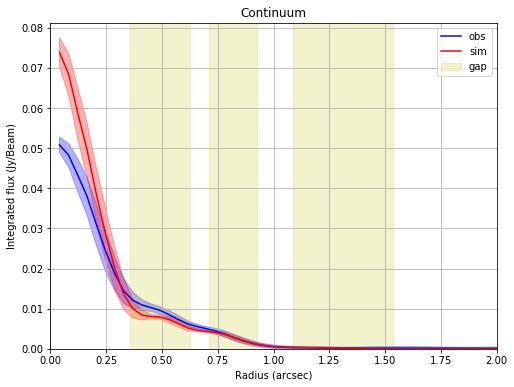

In [23]:
plt.figure(figsize=(8,6))
plt.plot(rr1/Dpc, accum1, 'b-', label='obs')
plt.fill_between(rr1/Dpc, accum1-1*std1, accum1+1*std1, color='blue', alpha=0.3)
plt.plot(rr2/Dpc, accum2, 'r-', label='sim')
plt.fill_between(rr2/Dpc, accum2-1*std2, accum2+1*std2, color='red', alpha=0.3)
plt.fill_betweenx([0,peak*1.5], (Gpc[0]-Wwid[0]/2)/natconst.au/Dpc, (Gpc[0]+Wwid[0]/2)/natconst.au/Dpc, alpha=0.2, color='y', label='gap')
plt.fill_betweenx([0,peak*1.5], (Gpc[1]-Wwid[1]/2)/natconst.au/Dpc, (Gpc[1]+Wwid[1]/2)/natconst.au/Dpc, alpha=0.2, color='y')
plt.fill_betweenx([0,peak*1.5], (Gpc[2]-Wwid[2]/2)/natconst.au/Dpc, (Gpc[2]+Wwid[2]/2)/natconst.au/Dpc, alpha=0.2, color='y')
plt.title('Continuum')
plt.xlabel('Radius (arcsec)')
plt.ylabel('Integrated flux (Jy/Beam)')
#plt.yscale('log')
plt.xlim(0.0, 2.0)
plt.ylim(0.0, peak*1.1)
plt.legend()
plt.grid()
plt.show()

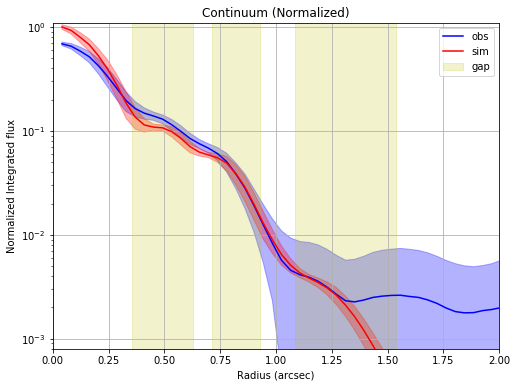

In [24]:
norm = peak
plt.figure(figsize=(8,6))
plt.plot(rr1/Dpc, accum1/norm, 'b-', label='obs')
plt.plot(rr2/Dpc, accum2/norm, 'r-', label='sim')
plt.fill_between(rr1/Dpc, (accum1-1*std1)/norm, (accum1+1*std1)/norm, color='blue', alpha=0.3)
plt.fill_between(rr2/Dpc, (accum2-1*std2)/norm, (accum2+1*std2)/norm, color='red', alpha=0.3)
plt.fill_betweenx([0.0008, 1.1], (Gpc[0]-Wwid[0]/2)/natconst.au/Dpc, (Gpc[0]+Wwid[0]/2)/natconst.au/Dpc, alpha=0.2, color='y', label='gap')
plt.fill_betweenx([0.0008, 1.1], (Gpc[1]-Wwid[1]/2)/natconst.au/Dpc, (Gpc[1]+Wwid[1]/2)/natconst.au/Dpc, alpha=0.2, color='y')
plt.fill_betweenx([0.0008, 1.1], (Gpc[2]-Wwid[2]/2)/natconst.au/Dpc, (Gpc[2]+Wwid[2]/2)/natconst.au/Dpc, alpha=0.2, color='y')
plt.title('Continuum (Normalized)')
plt.xlabel('Radius (arcsec)')
plt.ylabel('Normalized Integrated flux')
plt.yscale('log')
plt.xlim(0.0, 2.0)
plt.ylim(0.0008, 1.1)
plt.legend()
plt.grid()
plt.show()